## Quantum random number generator

First let us simulate a classical coin toss

In [1]:
import random
for n in range(5):
    if(random.random() < 0.5) :
        print("heads")
    else: 
        print("tails")
    


tails
tails
tails
heads
heads


This is not completely random, rather pseudorandom because it is being processed in a deterministic manner.

It is important to generate random numbers that are actually random, otherwise cryptography ciphers can be cracked if the key is created using poorly generated random numbers. To solve the problem of pseudo-randomness, let us use the concept of measurements of quantum superpositions. One defining property of quantum mechanics is that we do not know the state of the qubit until we measure or observe it. The result is completely undefined before the moment of measurement. This means we can use quantum computers for the ultimate coin flip.

In [2]:
import qiskit
qr = qiskit.QuantumRegister(1)
cr = qiskit.ClassicalRegister(1)
circuit = qiskit.QuantumCircuit(qr, cr)

To generate an equal superposition of a qubit |Ψ⟩ of |0⟩ and |1⟩, apply the hadamard gate

In [3]:
circuit.h(qr)

In [4]:
circuit.draw(output="text")

┌───┐
  q0: ┤ H ├
      └───┘
c0: 1/═════

In [5]:
circuit.measure(qr, cr)

In [6]:
circuit.draw(output="text")

┌───┐┌─┐
  q0: ┤ H ├┤M├
      └───┘└╥┘
c0: 1/══════╩═
            0

In [13]:
import qiskit_aer
backend = qiskit_aer.Aer.get_backend('qasm_simulator')
circuit_ = qiskit.transpile(circuit, backend)
job = backend.run(circuit_, shots=5, memory=True)

In [14]:
result = job.result().get_memory()
print(result)
for output in result:
    if output == '0':
        print("heads")
    else:
        print("tails")

['1', '1', '0', '1', '0']
tails
tails
heads
tails
heads


## More general random number generation

Sometimes we need to generate numbers within a certain range, rather than just 0 or 1 or a coin flip. We will need to set up probability distributions for which each outcome.

This task is perfect for quantum computers as they will be able to efficiently sample from probability distributions that would be infeasible to perform using a classical computer

To represent numbers larger than 0 and 1, we need more qubits. n qubits can represent a binary string of numbers from 0 to 2^(n-1). If we want to generate random numbers between 0 and 7, we will need to choose n=3.

For a uniform probability distribution over all numbers, we will apply a Hadamard on each.

In [22]:
import qiskit.visualization
qr = qiskit.QuantumRegister(4)
cr = qiskit.ClassicalRegister(4)
program = qiskit.QuantumCircuit(qr, cr)

for i in range(4):
    program.h(qr[i])

program.measure(qr, cr)
program.draw(output="text")

┌───┐┌─┐         
q7_0: ┤ H ├┤M├─────────
      ├───┤└╥┘┌─┐      
q7_1: ┤ H ├─╫─┤M├──────
      ├───┤ ║ └╥┘┌─┐   
q7_2: ┤ H ├─╫──╫─┤M├───
      ├───┤ ║  ║ └╥┘┌─┐
q7_3: ┤ H ├─╫──╫──╫─┤M├
      └───┘ ║  ║  ║ └╥┘
c6: 4/══════╩══╩══╩══╩═
            0  1  2  3

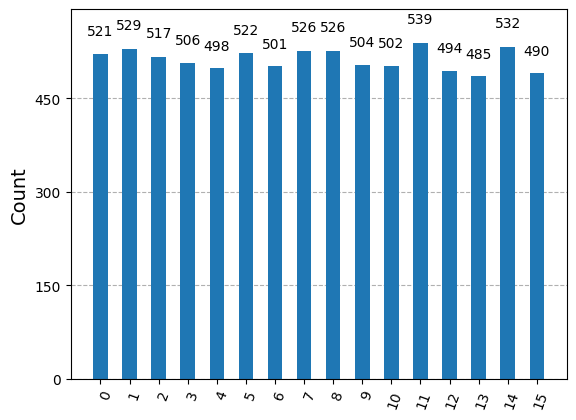

In [23]:
backend = qiskit_aer.Aer.get_backend('qasm_simulator')
program_ = qiskit.transpile(program, backend)
job = backend.run(program_, shots = "8192")
bit_counts = job.result().get_counts()
int_counts = {}
for bitstring in bit_counts:
    int_counts[ int(bitstring,2)] = bit_counts[bitstring]

qiskit.visualization.plot_histogram(int_counts)

Here, we can see all 16 numbers from 0 to 15 are printed with almost equal probability, indicating that our quantum number generator is random